<a href="https://colab.research.google.com/github/anebawk/DS_Projects/blob/main/PYF_Project_LearnerNotebook_FullCode_Kwabena_Dwaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv("/Users/coby/Desktop/PGP-DSBA_Texas/Python for Data Science/foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# extracting the shape of the dataset
df.shape

(1898, 9)

#### Observations:
The Data has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# chcking info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The dataset has 5 numerical columns, 4 object type column and memory usage of 133.6+KB

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# checking for missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no null values in the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# checking the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
Average time it takes for food to be prepared is 27.37 minutes, the maximum food preparation time is 35 minutes whiles the mimimum time it takes to prepare a meal is 20 minutes.


### **Question 5:** How many orders are not rated?

In [ ]:
# checking the number of orders not rated
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
There are 736 orders not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions.

In [ ]:
# Order ID - Checking unique order ID
df['order_id'].nunique()

1898

#### Observation:  
There are 1898 unique orders in the  dataset.

In [ ]:
# Customer ID - Checking unique Customer ID
df['customer_id'].nunique()

1200

There are 1200 unique customers. This means there are customers with more than one order.

In [ ]:
# Restaurant Name - checking restaurant name
df['restaurant_name'].nunique()

178

There are 178 unique restaurants where food were ordered from.

In [ ]:
# Cuisine Type - checking unique cuisine types in the dataset
df['cuisine_type'].nunique()

14

#### There are 14 unique cuisines across restaurants

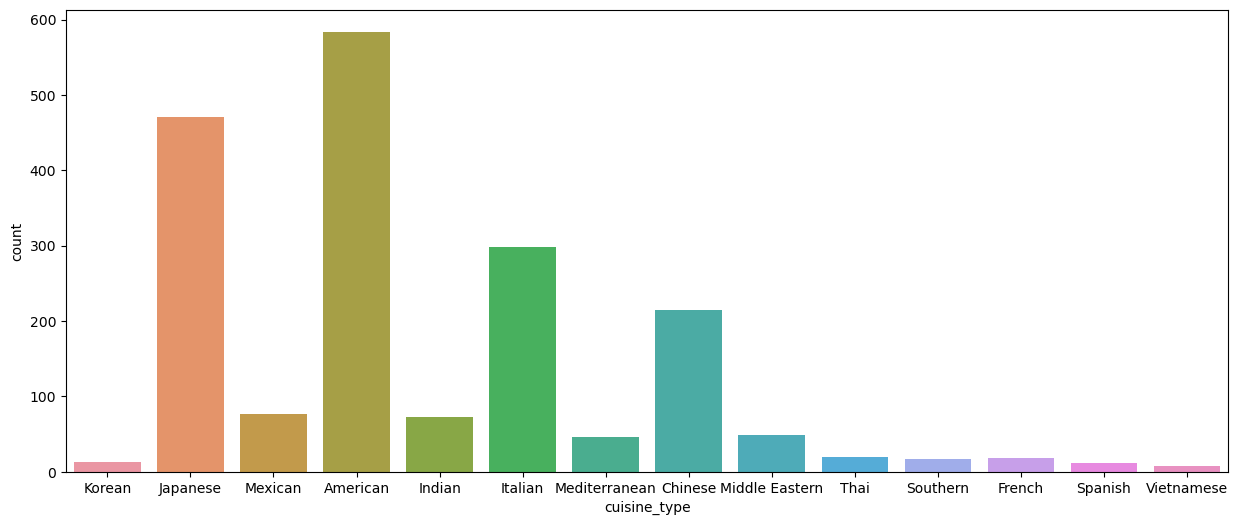

In [ ]:
# creating a countplot for cuisine types
plt.figure(figsize= (15,6))
sns.countplot(data=df, x='cuisine_type');

- There are 14 unique cuisines ordered over the period of the dataset
- American cuisine is the most orderd cusine followed by Japanese and Italian cuisines.
- The Least orderd cuisine is vietnmese followed by Korean and Spanish cuisines.

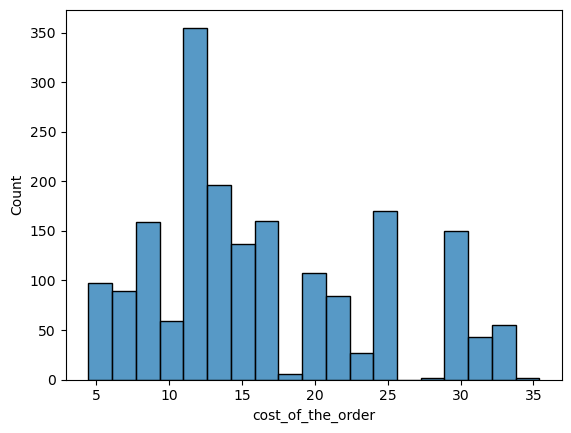

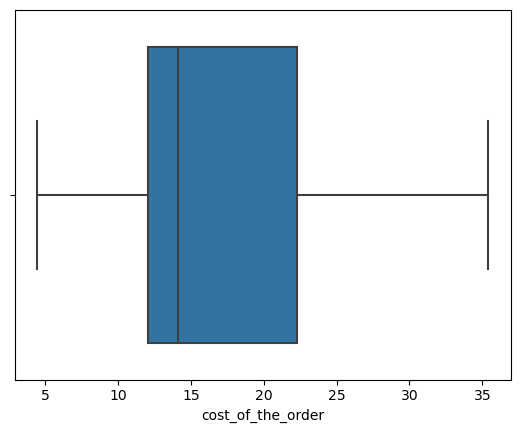

In [ ]:
# Observations on cost of the orders
sns.histplot(data=df, x='cost_of_the_order')# making a histogram for the cost of order
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')# making a boxplot for the cost of order
plt.show()

- The distribution of cost of orders is right-skewed.
- All orders are between 5 dollars to 35 dollars with 50% of all orders across restuarants  costing less than 15     dollars
- There are no outliers with the cost of the orders

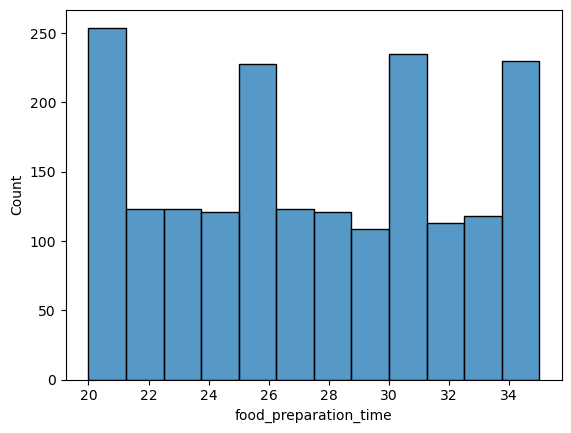

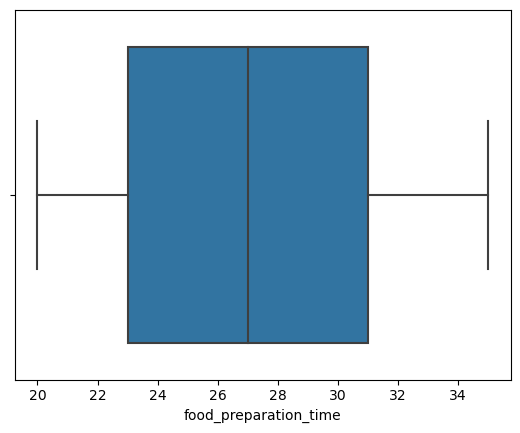

In [ ]:
# Observations on Food Preparation time.
sns.histplot(data=df, x='food_preparation_time')# making a histogram  for food preparation time.
plt.show()
sns.boxplot(data=df, x='food_preparation_time')# making a boxplot for food preparation time
plt.show()

Observations:
- The distribution of food preparation time is uniform,
- The minimum food preaparationt time is around 20  minutes.
- 50% of all orders are prepared in about 27 minutes while the maximum time it takes to prepare an order is 34       minutes.

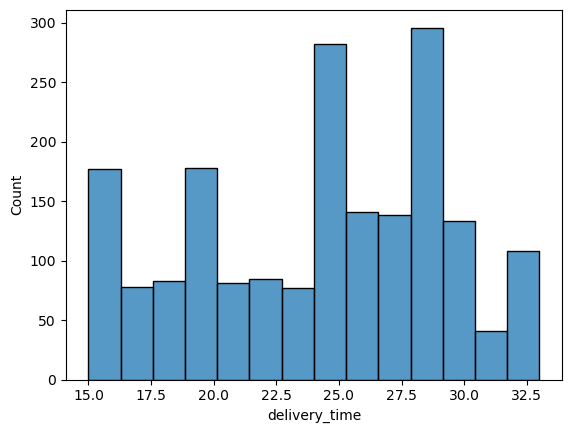

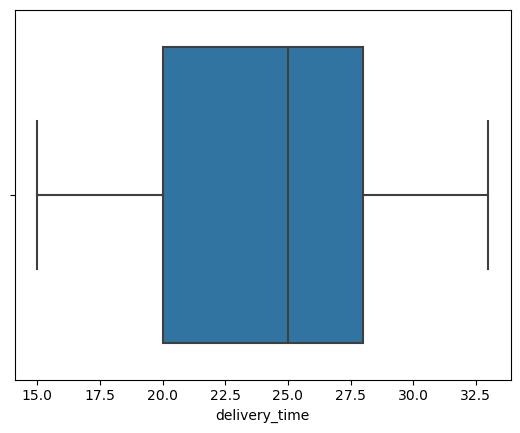

In [ ]:
# Observations on delivery time
sns.histplot(data=df, x='delivery_time')# making a histogram for food delivery time
plt.show()
sns.boxplot(data=df, x='delivery_time')# making a boxplot for food delivery time
plt.show()

- The distribution of delivery time is left skewed.
- There are no outliers in delivery time.
- 50% of all orders are delivered in 25 minutes.
- The minimum delivery time is about 15 minutes while the maximum delivery time is 32.5 minutes

In [ ]:
# Rating-checking the unique values for rating
df['rating'].nunique()

4

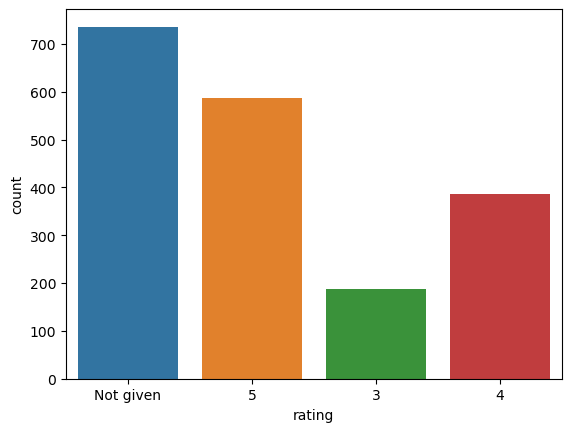

In [ ]:
sns.countplot(data=df,x='rating');# making a count plot of rating

- There 4 unique ratings.
- A little over 730 orders were not rated at all.
- Almost 600 orders received a rating of 5, orders that received a rating of 4 were 380, whiles almost 190 -         recieved a rating of 3.

In [ ]:
# Obsarvation on Day of the week
# checking unique values of the day of the week.
df['day_of_the_week'].nunique()

2

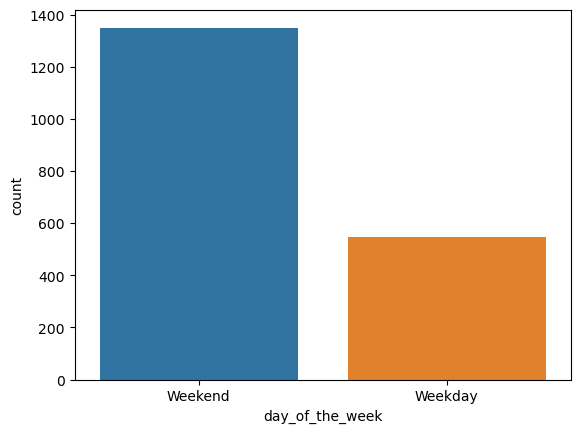

In [ ]:
# making a countplot of the day of the week
sns.countplot(data=df,x='day_of_the_week');

Observation:
- Weekend has the higest number of orders followed by weekday.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# checking the top 5 restaurants by number of orders
top5_restaurant= df.groupby('restaurant_name')[['order_id']].count().sort_values('order_id',ascending=False).reset_index().head(5)
top5_restaurant

,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


<Figure size 2000x600 with 0 Axes>

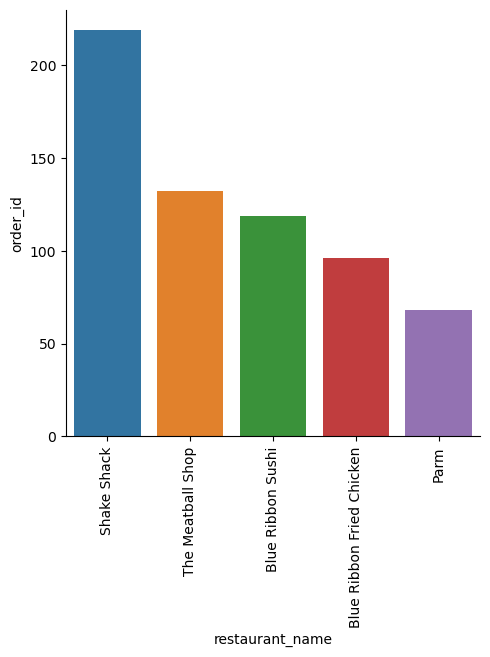

In [ ]:
plt.figure(figsize=(20,6))
sns.catplot(data=top5_restaurant,x= 'restaurant_name', y='order_id', kind='bar')
plt.xticks(rotation=90);

#### Observations:
The top five restaurant are:
1. Shake Shack witt 219 orders
2. The Meatball Shop 132 orders
3. Blue Ribbon Sushi 119 orders
4. Blue Ribbon Fried Chicken 96 orders
5. Parm with 68 oders

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# checking the most ordered cuisine on a weekend
df_wkd_cus=df[df['day_of_the_week']== 'Weekend']
df_wkd_cus['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
The most ordered cuisine on Weekend is American cuisine with 415 orders during weekend.
This followed by Japanese with 335 and Itailian with 207.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# # get orders above 20 dollars
df_above_20 = df[df['cost_of_the_order']>20]

# total oders of ordrs above 20 dollars
df_above_20.shape[0]

# calculate percentage of orders above 20 dollars
percent_above_20=(df_above_20.shape[0]/df.shape[0])*100
print(round(percent_above_20,2),'%')

29.24 %


#### Observations:
 29.24% of all orders are above $20

### **Question 10**: What is the mean order delivery time?

In [ ]:
# checking the mean of oder devilvery time.
df['delivery_time'].mean()

24.161749209694417

#### Observations:
- The mean delivery time is 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
df['customer_id'].value_counts(ascending=False)

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:
- Customer with Id 52832 has the highest number of orders at 13, followed by 47440 with 10 orders and 83287 with 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Correlation among the Variables

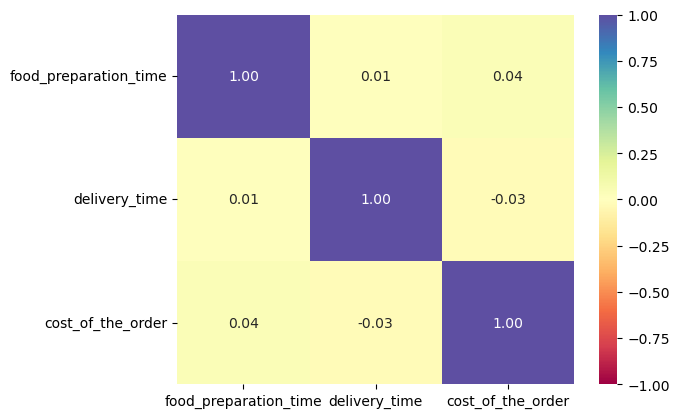

In [ ]:
# plot a heatmap to show corelation amonng numerical variables
num_var = ['food_preparation_time', 'delivery_time', 'cost_of_the_order']
sns.heatmap(df[num_var].corr(), annot=True, vmin=-1, vmax =1,fmt=".2f",cmap="Spectral")
plt.show()

Observations:
- There seem to be some correlation between cost of the order and food prepartion time, however this does not       apper to be   strong
- Cost of the order is negatively correlated to delivery time.
- Overall there seem not to be storng relationship among the numeric varables.

#### Rating vs Cost of the order

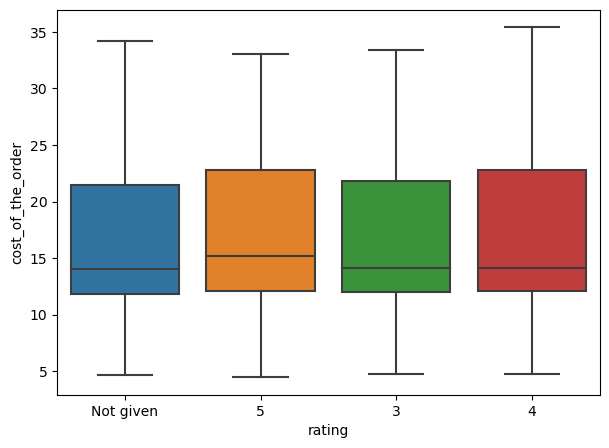

In [ ]:
# Checking relationshio between cost of order and rating
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='rating',y='cost_of_the_order',)
plt.show()

- As we can see 75% of orders rated 5 were priced around 23 dollars.
- This is followed by orders with rating of 4 at 22 dollars.
- Orders rated 3 had 75% of the orders costing 22.50 dollars, whereas orders not rated had 75% of their cost         around 21 dollars

#### Rating vs Delivery time

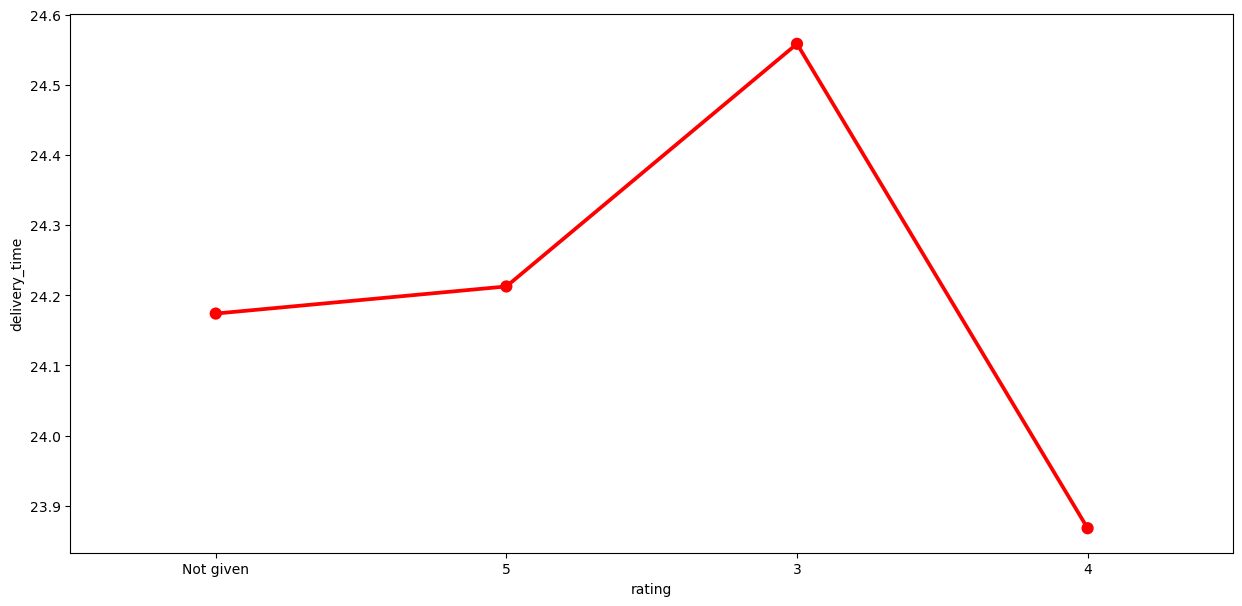

In [ ]:
# Checking relationshio between Delivery time and rating
plt.figure(figsize=(15,7))
sns.pointplot(data=df, x='rating',y='delivery_time',ci=False, color='red')
plt.show()

Observations.
- As we see orders rated 3 took 24.6 minutes to deliver,followed by orders rated 5 with a little above 24.2         minutes, those rated 4 took less than 23 minutes to delivery while those not rated had a delivery time  of         almost  24.2 minutes.

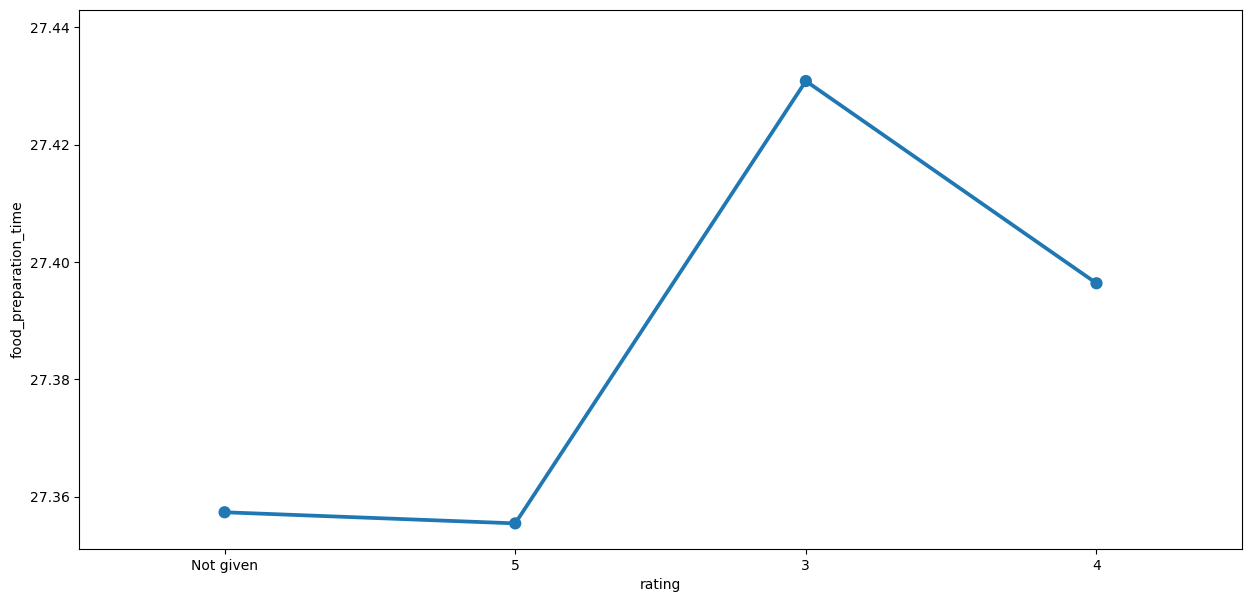

In [ ]:
# Checking relationship between food preparation time and rating
plt.figure(figsize=(15,7))
sns.pointplot(data=df, x='rating',y='food_preparation_time',ci=False)
plt.show()

Observation.
- It appears from the graph that rating was slightly impacted by the food preparation time.
- As we can see orders rated 5 had average preparation time of less than 27 minutes. Orders which are rated 4 had   an averages time of 27.36  while orders rated 3 took approximately 27.5 minutes on the avrage.

### Cuisine vs Cost of the order

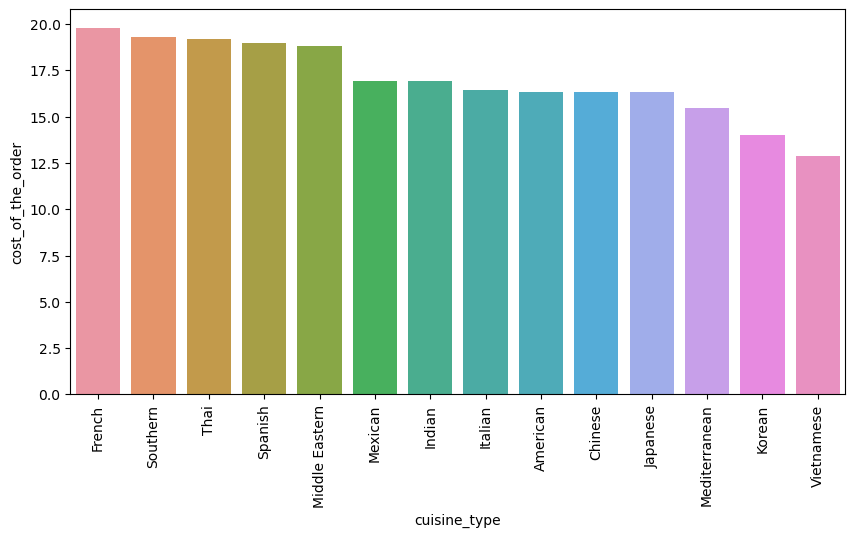

In [ ]:
#making a bar plot to Visualize the relationship between cuisine and cost of the order
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='cuisine_type',y='cost_of_the_order',ci=None,
            order=df.groupby('cuisine_type').cost_of_the_order.mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

Observation:
- It cost on the average, about 20 dollars to order a french cuisine which is the higest priced cuisine.
- This is followed by Southern cuisine with an average price of 19.5 dollars, and  Thai cuisine with an   average   price about 19 dollars.
- The cheap cuisine to order is Vietnamese which had average cost of 12.20 dollars follwed Korean with an average   cost of 14 dollars and Mediterranean cuisine with 15 dollars on the average.

In [ ]:
### Cusine vs Food Preparation time

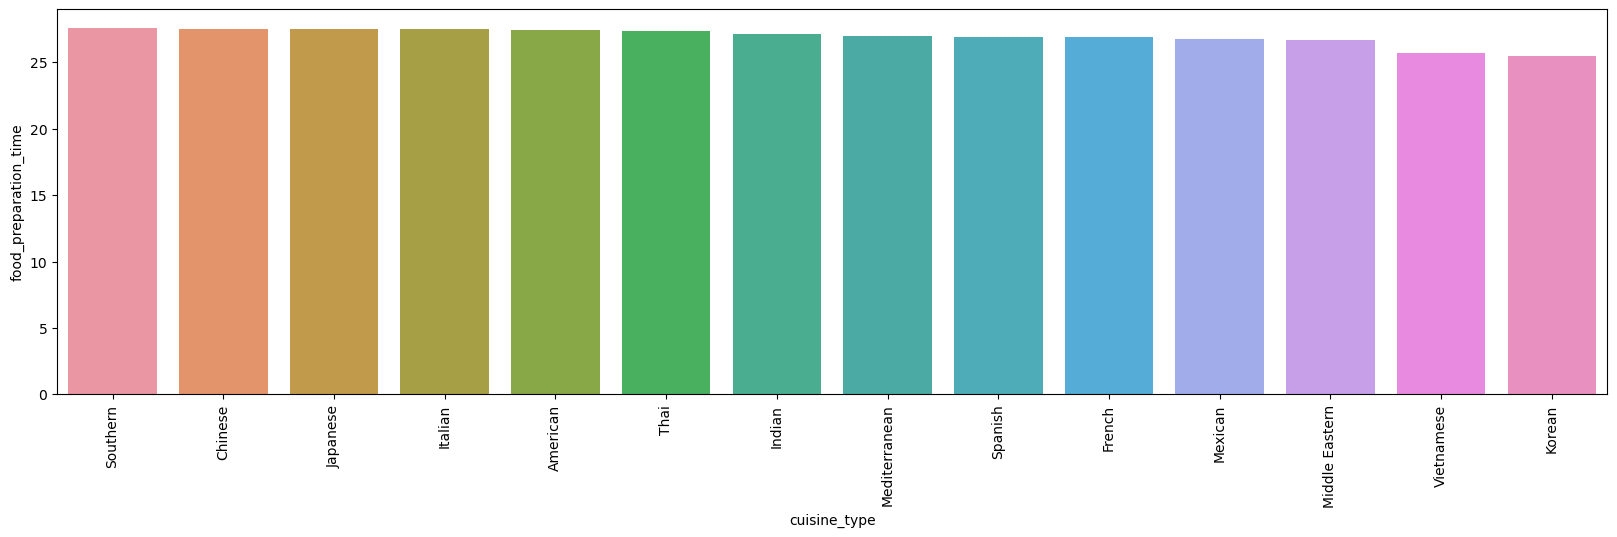

In [ ]:
# making a barplot to see relationship between cuisine and food preparation time
plt.figure(figsize=(20,5))
sns.barplot(data=df,x='cuisine_type',y='food_preparation_time',ci=None,
            order=df.groupby('cuisine_type').food_preparation_time.mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

Observation:
- Southern cuisine has the highest food prepartion time. This  is follwed by Japanese and Chinese cuisine
- Korean cuisine has the least food preparation time followed by Middle Eastern Cuisine

### Day of the Week vs Delivery Time

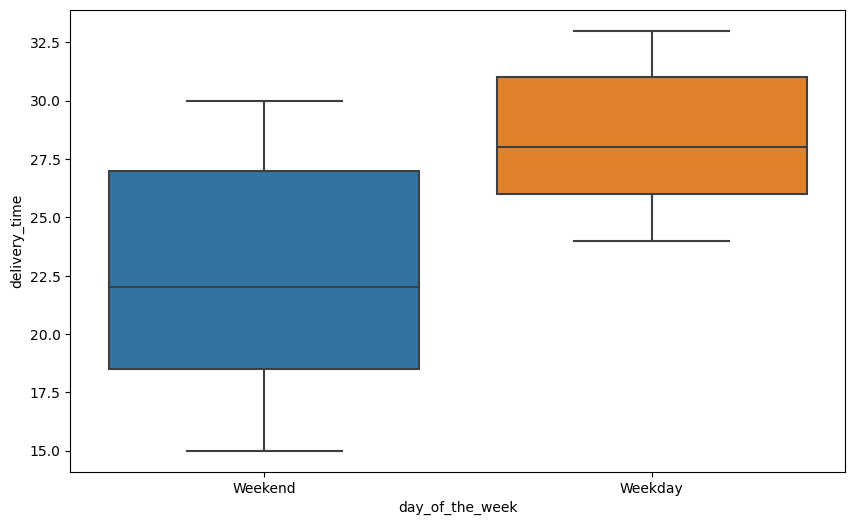

In [ ]:
# Ploting a boxplot to show relationship between day of the week and Delivery time
# making a catplot to see relationship between cuisine and food preparation time
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

Obervation
- 75% of all orders on a weekday are delivered 31 minutes, whiles 75% of  weekend orders are delivered in less than 22 minutes

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
rated = df[df['rating']!='Not given'].copy() # separating the not given rating

rated['rating']= rated['rating'].astype(int)# converting datatype from object to integer

#creating a new dataframe with restaurant name and the rating count
rest_count= rated.groupby('restaurant_name')[['rating']].count().sort_values('rating',ascending=False).reset_index().head(20)
rest_count

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Nobu Next Door,23


In [ ]:
# restaurant with rating more than 50
rest_list=rest_count.loc[rest_count['rating']>50,'restaurant_name']

# Fetching the data for restaurant with rating count of above 50
rest_info =rated [rated['restaurant_name'].isin(rest_list)].copy()

# Grouping the retaurants with their average rating
rest_info.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


Observation
- Restaurants meeting the promotion creteria are;
1. The Meatball Shop with an average rating of 4.5
2. Blue Ribbon Fried Chicken with average rating of 4.33
3. Shake Shack with average rating of 4.28
4. Blue Ribbon Shshi with averating rating of 4.22


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Define a function to calculate the revenue
def calculate_rev(order):
    if order > 25:
        return order*0.25
    elif order > 5:
        return order*0.05
    else:
        return order*0
df['Revenue']= df['cost_of_the_order'].apply(calculate_rev)
total_revenue = df['Revenue'].sum()
print(round(total_revenue,2))

3365.34


#### Observations:
- The net revenue is $3,365.34

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Creating a new feature to store Total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# caculating orders that take more than 60 minutes
df_above_60min = df[df['total_time']>60]

# calcuating the percentage or oders that takes more than 60 minutes to delivery.
percent_above_60min= (df_above_60min).shape[0]/df['total_time'].shape[0]
print(round(percent_above_60min,2),'%')

0.11 %


#### Observations:
- The percentage of orders that takes more than 60 minutes to get deilvered from the time the order is placed is 0.11%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# writing the code to fetch the average delivery time on weekdays
avg_weekday_del = df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
print(round(avg_weekday_del,2))

28.34


In [ ]:
# writing the code to fetch the average delivery time on weekend
avg_weekend_delivery= df_wkd_cus['delivery_time'].mean()
print(round(avg_weekend_delivery,2))

22.47


#### Observations:
- The average delivery time on weekday is 28.34 minutes
- The average delivery time on weekend is 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusions:
We analyzed a dataset of nearly 1.9k online food order information across 178 unique restaurants preparing 14 different cuisines and ordered by 1200 unique customers over period of the dataset.

We have been able to conclude that;

2.	It cost between 5 dollar to 35 dollars to order any cuisine among all the restaurants.
3.	We can also conclude that orders are much higher on weekend for food than on week days. American cuisine is       the most ordered cuisine on weekend.
4.	The it time takes for cuisines to prepared across all restaurant is between 20 to 34 minutes
5.	The top 5 restaurants by orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried           Chicken and Parm.
6.	Almost 38.42% of orders were not rated.
7.	On the average it took 24.16 minutes for orders to be delivered.


### Recommendations:

1.	American cuisine is the most ordered cuisine with Japanese and Italian cuisines also showing great potential.
2.  Weekends are peak demand periods for online food orders which means more delivery persons should be available on     weekends
3.  Reasons for not rating a particular order should be obtained to improve cutomer experince.
4.  Promotional offers for the restaurants should target weekdays to drive orders during weekdays.
